In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images / 255, testing_images / 255

class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

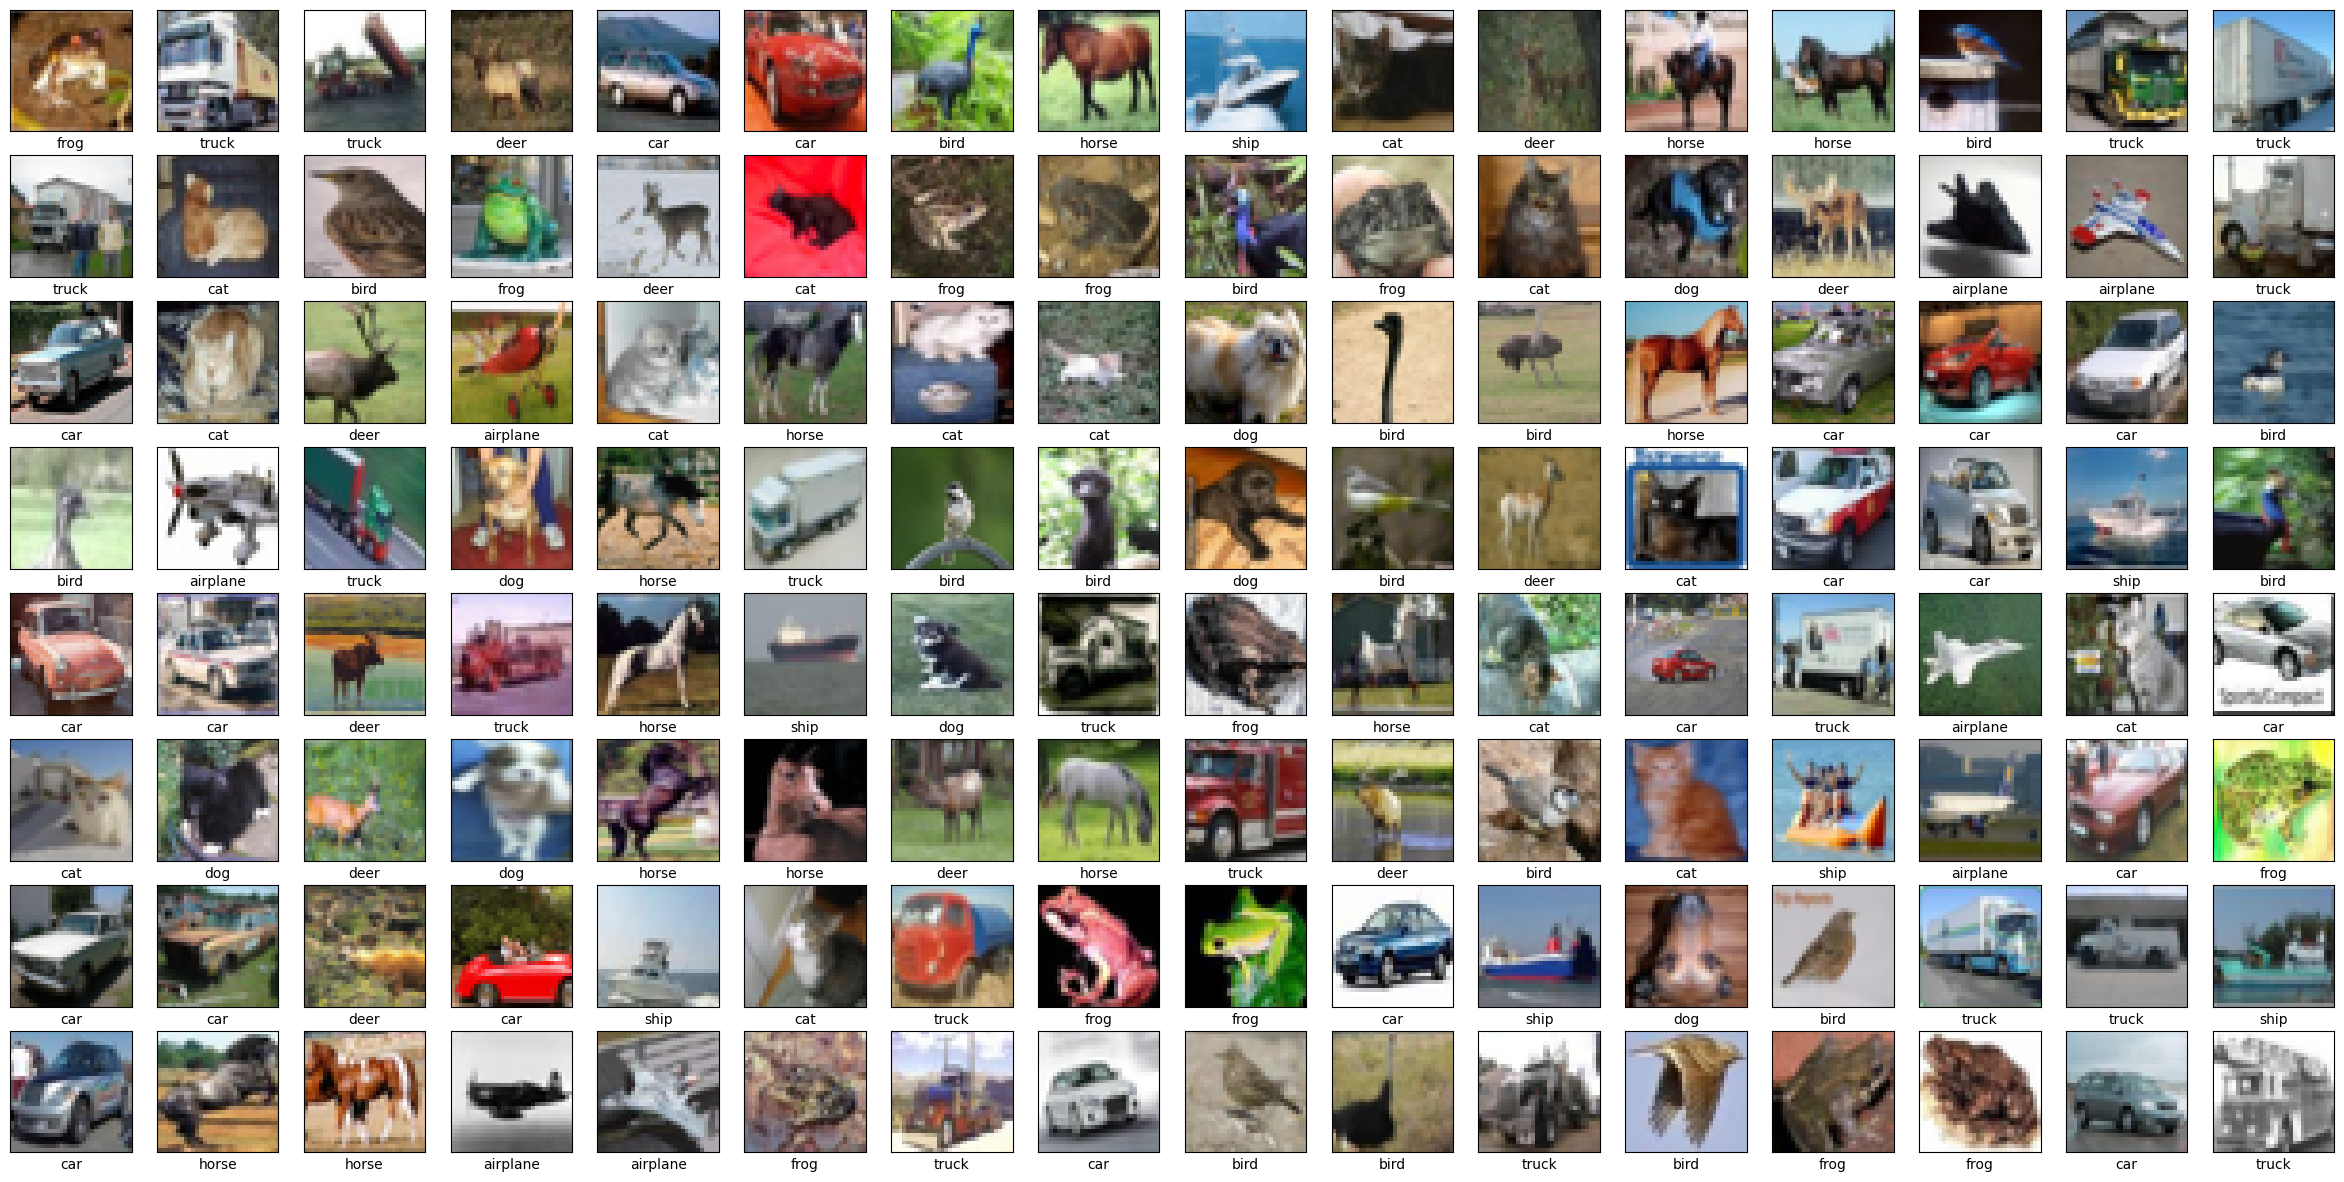

In [ ]:
plt.figure(figsize=(30, 30))  # Set the figure size to 30x30 inches
for i in range(128):
    plt.subplot(16, 16, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()


In [ ]:
training_images = training_images
training_labels = training_labels
testing_images = testing_images
testing_labels = testing_labels

In [ ]:
#Convulational Layer is used to check features for objects
#Dense layer is for Output
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D (64, (3,3), activation='relu'))
model.add(layers. MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers. Flatten())
model.add(layers. Dense (64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_info = model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5372 - accuracy: 0.4383 - val_loss: 1.2662 - val_accuracy: 0.5376
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1960 - accuracy: 0.5733 - val_loss: 1.0813 - val_accuracy: 0.6144
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0344 - accuracy: 0.6355 - val_loss: 1.0260 - val_accuracy: 0.6321
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9311 - accuracy: 0.6721 - val_loss: 0.9555 - val_accuracy: 0.6613
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8555 - accuracy: 0.6988 - val_loss: 0.9800 - val_accuracy: 0.6597
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7967 - accuracy: 0.7213 - val_loss: 0.8753 - val_accuracy: 0.6936
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7469 - accuracy: 0.7374 - val_loss: 0.8969 - val_accuracy

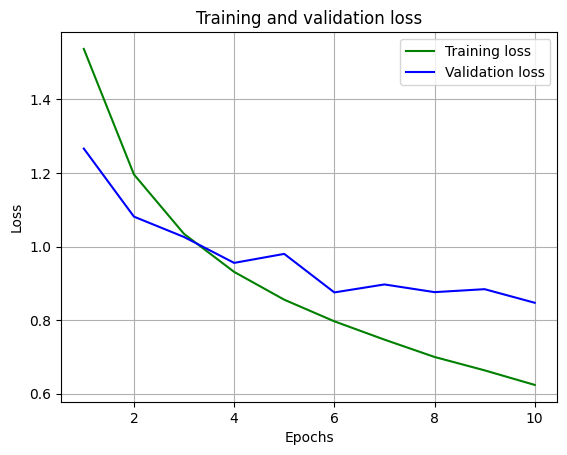

In [ ]:
loss = training_info.history['loss']
validation_loss = training_info.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g-', label='Training loss')
plt.plot(epochs, validation_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

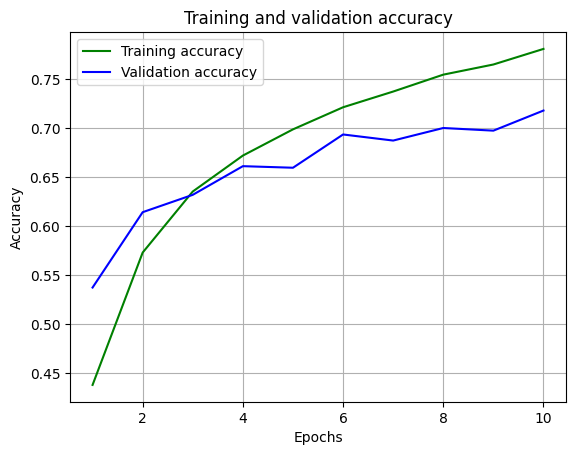

In [ ]:
accuracy = training_info.history['accuracy']
validation_accuracy = training_info.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'g-', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print (f"Accuracy: {accuracy}")
model.save('image_classifier.model')

313/313 [==============================] - 1s 3ms/step - loss: 0.8471 - accuracy: 0.7180
Loss: 0.8471315503120422
Accuracy: 0.7179999947547913


1/1 [==============================] - 0s 105ms/step


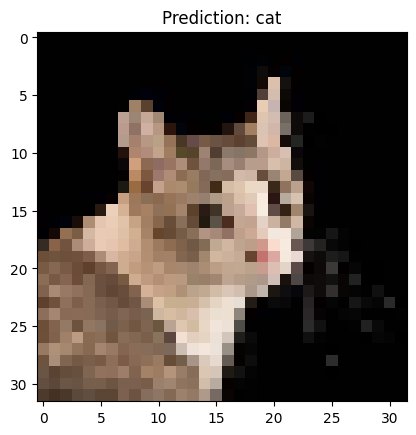

1/1 [==============================] - 0s 29ms/step


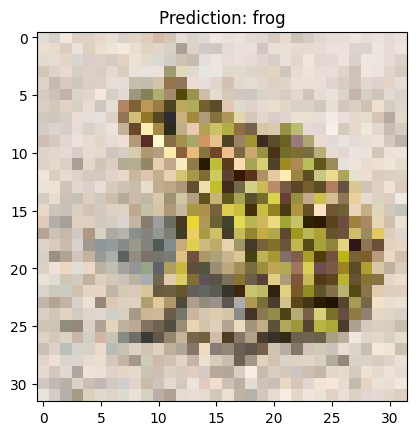

1/1 [==============================] - 0s 27ms/step


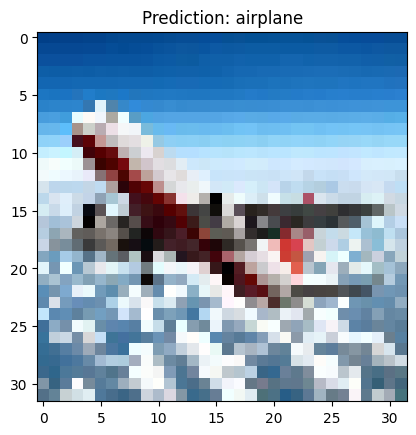

1/1 [==============================] - 0s 28ms/step


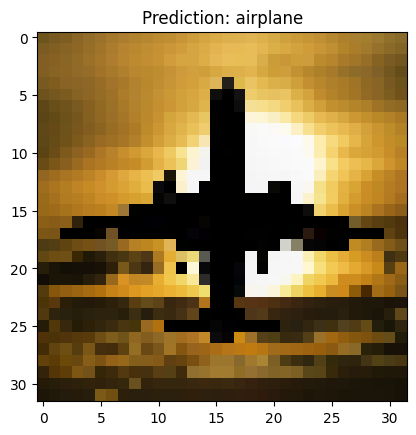

1/1 [==============================] - 0s 36ms/step


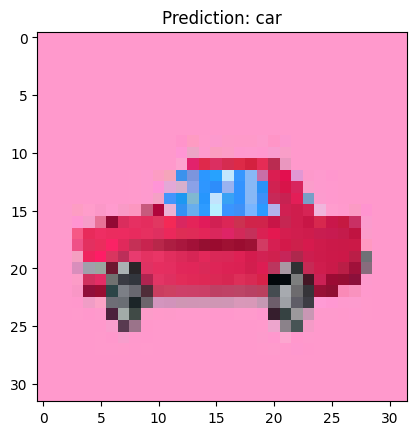

1/1 [==============================] - 0s 26ms/step


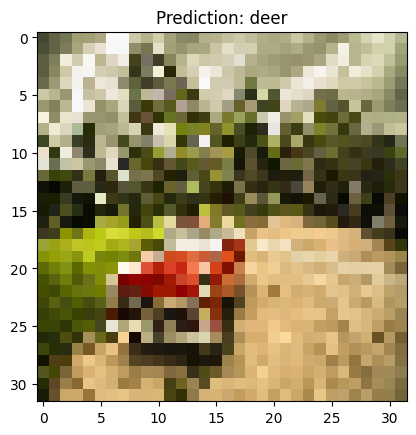

1/1 [==============================] - 0s 27ms/step


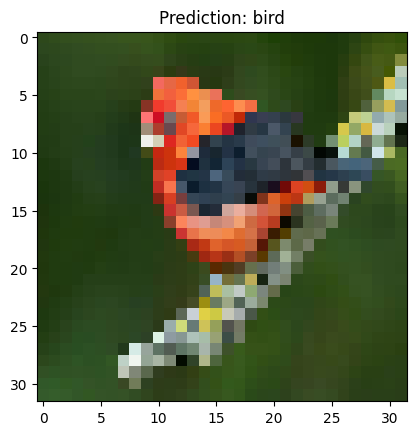

1/1 [==============================] - 0s 26ms/step


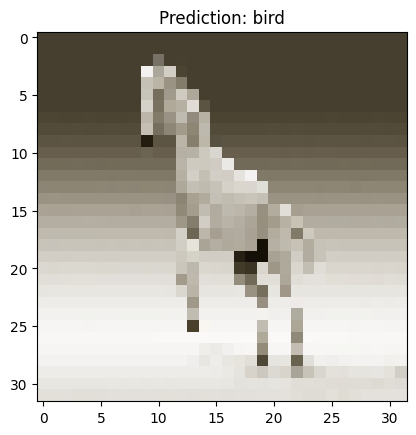

1/1 [==============================] - 0s 33ms/step


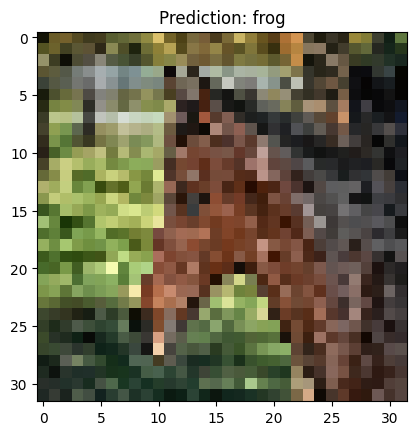

1/1 [==============================] - 0s 18ms/step


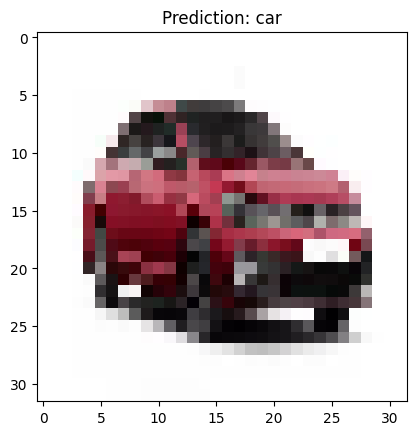

1/1 [==============================] - 0s 19ms/step


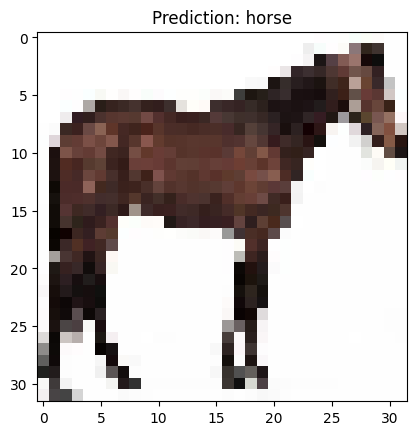

1/1 [==============================] - 0s 19ms/step


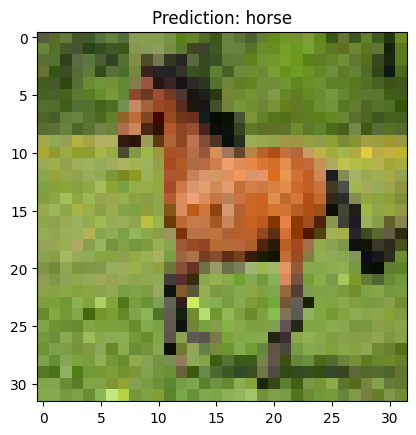

1/1 [==============================] - 0s 30ms/step


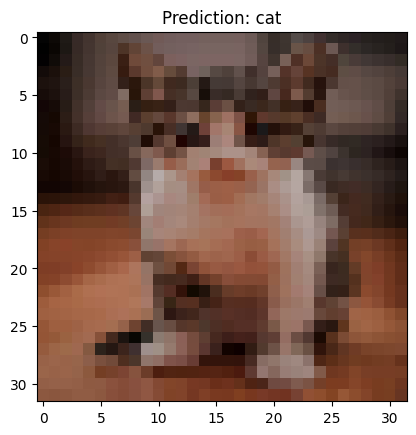

1/1 [==============================] - 0s 20ms/step


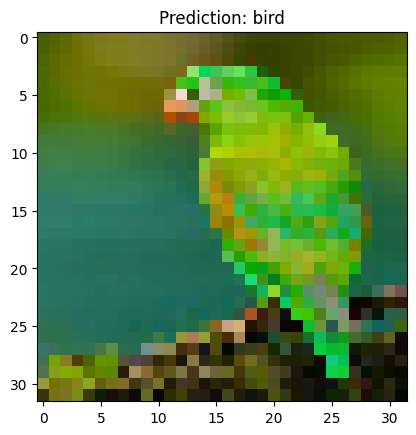

In [ ]:
model = models.load_model('image_classifier.model')

# List of image file paths
image_paths = ['cat2.jpeg', 'frog.jpeg', 'plane1.jpeg', 'plane2.jpg', 'car1.jpeg', 'car2.jpg', 'bird1.jpg', 'horse1.jpg', 'horse2.jpg','11.jpg','12.jpg','13.jpg','14.jpg','15.jpg']

for image_path in image_paths:
    # Load and preprocess the image
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (32, 32))  # Resize the image to match the model's input shape
    img = img.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    prediction = model.predict(img)
    index = np.argmax(prediction)
    predicted_class = class_names[index]

    # Display the image and prediction
    plt.imshow(img[0])
    plt.title(f'Prediction: {predicted_class}')
    plt.show()
